# Combined Time-Frequency Stimulus Response Figures

In [1]:
save_folder = '/home/jtauber/Documents/MillerData/analysis2/lfp/spectral/spectrogram/total_power/figures/'
save_figs = False

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.multitest as mt
import seaborn as sns

from pap.view import get_colors
from pap.utils import pickle_open
from pap.view import plot_spectrogram
import neural_analysis as na

sns.set()
sns.set_style('ticks')
sns.set_context('talk')

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':'Arial'})

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [4]:
monkey = 'comb'
all_results_jones = pickle_open('jones_total_power_400_fw4_250_long.pickle')
# all_results = pickle_open('jones_total_power_400_fw4_250.pickle')
all_results_mary = pickle_open('mary_total_power_400_fw4_250_long.pickle')
# all_results = pickle_open('mary_total_power_400_fw4_250.pickle')

all_results = xr.concat([all_results_mary, all_results_jones], dim='session')

In [5]:
sids = all_results.session.data
conds = all_results.cond.data
areas = all_results.area.data
stims = all_results.stim.data

base_freq = all_results.freqs.data
timepts = all_results.timepts.data

In [6]:
areas_ord = ['CPB', '7b', 'FEF', 'vlPFC']
areas_ord.reverse()
conv_label = {'vlPFC': 'PFC',
              'FEF': '8A',
              'CPB': 'STG',
              '7b': 'PPC'}
name_conv = {'tone_only': 'UC Tone',
             'puff_only': 'UC Puff',
             'cpt_tone': 'C Tone - Puff',
             'cpt_puff': 'C Puff'}

In [7]:
db_change_results = all_results.copy()

# baseline_cut = np.where()

for sid in sids:
    for cond in conds:
        for area in areas:
            for stim in stims:
                raw_data = all_results.loc[sid,cond,area,stim,:,:].data
                baseline = raw_data[:,:5].mean(1)[:,None]
                db_change = 10*np.log10(raw_data / baseline)
            
                db_change_results.loc[sid,cond,area,stim,:,:] = db_change
        
    

In [79]:
all_results.timepts[30] - 0.5

<xarray.DataArray 'timepts' ()>
array(1.2)
Coordinates:
    timepts  float64 1.7

In [9]:
def cut_spec(spec, freq, cut_low, cut_high):
    cut_ind_high = np.where(freq <= cut_high)[0][-1] + 1
    cut_ind_low = np.where(freq >= cut_low)[0][0]
    
    if spec.ndim == 2:
        return spec[cut_ind_low:cut_ind_high,:], freq[cut_ind_low:cut_ind_high]
    if spec.ndim == 3:
        return spec[:,cut_ind_low:cut_ind_high,:], freq[cut_ind_low:cut_ind_high]

In [10]:
# timepts = all_results.timepts - 0.5
# timepts

In [44]:
area = 'CPB'
stim = 'puff_only'
pre_ind = 2
post_ind = 10

# drug = db_change_results.loc[:,'drug2',area,stim,:,:].mean('session')
raw_awake = all_results.loc[sid,'awake',area,stim,:,:].data
raw_drug = all_results.loc[sid,'drug2',area,stim,:,:].data
freq_orig = all_results.freqs.data
cut_low = 5
cut_high = 120
awake, freq = cut_spec(raw_awake, freq_orig, cut_low, cut_high)
drug, freq = cut_spec(raw_drug, freq_orig, cut_low, cut_high)

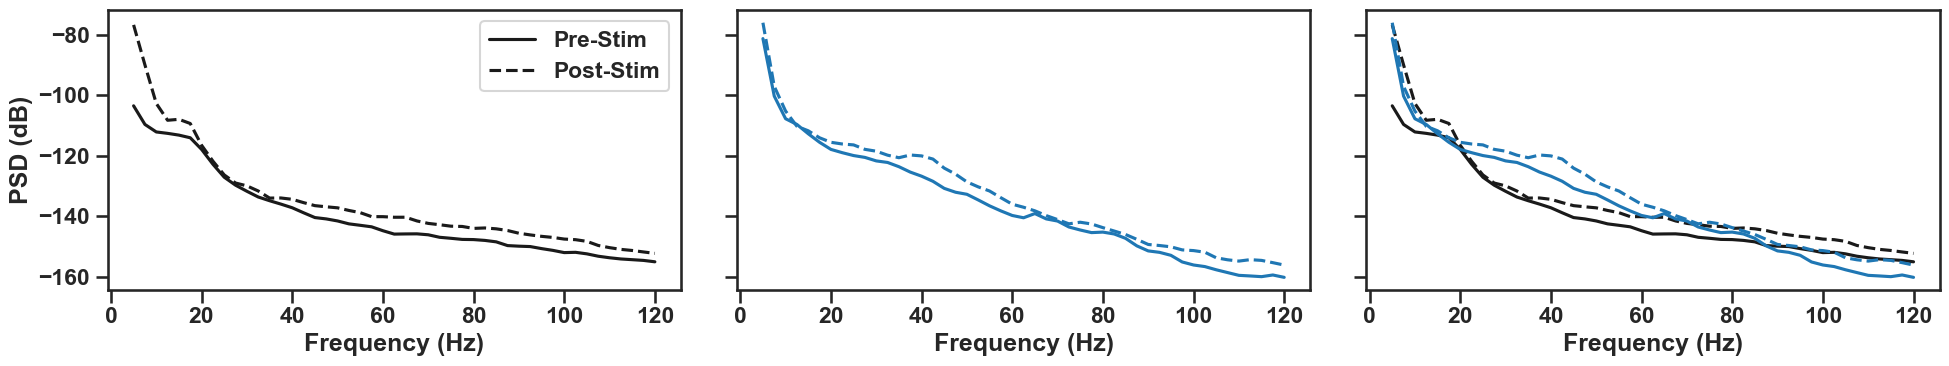

In [87]:
fig, ax = plt.subplots(1,3,figsize=(20,4), sharey=True)
awake_pre = 10*np.log(awake[:,pre_ind])
awake_post = 10*np.log(awake[:,post_ind])
drug_pre = 10*np.log(drug[:,pre_ind])
drug_post = 10*np.log(drug[:,post_ind])
ax[0].plot(freq, awake_pre, color='k', label='Pre-Stim')
ax[0].plot(freq, awake_post, color='k', linestyle='--', label='Post-Stim')
ax[1].plot(freq, drug_pre, color='tab:blue')
ax[1].plot(freq, drug_post, color='tab:blue', linestyle='--')
ax[2].plot(freq, awake_pre, color='k')
ax[2].plot(freq, awake_post, color='k', linestyle='--')
ax[2].plot(freq, drug_pre, color='tab:blue')
ax[2].plot(freq, drug_post, color='tab:blue', linestyle='--')

ax[0].set_xlabel('Frequency (Hz)')
ax[1].set_xlabel('Frequency (Hz)')
ax[2].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('PSD (dB)')
ax[0].legend()
plt.tight_layout()

In [12]:
timepts = all_results.timepts - 0.5

In [29]:
all_results.coords

Coordinates:
  * cond     (cond) <U5 'awake' 'drug2'
  * area     (area) <U5 'CPB' '7b' 'FEF' 'vlPFC'
  * stim     (stim) <U9 'tone_only' 'cpt_tone' 'puff_only'
  * freqs    (freqs) float64 5.0 7.5 10.0 12.5 15.0 ... 242.5 245.0 247.5 250.0
  * timepts  (timepts) float64 0.2 0.25 0.3 0.35 0.4 ... 2.6 2.65 2.7 2.75 2.8
  * session  (session) object '0809' '0818' '0822' ... '0206' '0210' '0301'

In [27]:
pre_ind = 2
post_ind = 10

In [ ]:
low = -5
high = 5

phase_fontsize = 24
tick_fontsize = 28
tick_start = 10

tick_space = 20

label_fontsize = 24

timepts = all_results.timepts - 0.5

bar_alpha = 0.4

fwer = 0.01

contour_width = 0.35

In [98]:
def plot_raw_pre_post(stim, cut_low, cut_high):
    
    # fig, ax = plt.subplots(1,3, figsize=(12,12), gridspec_kw={'width_ratios': (1,1,1)}, sharex=True, sharey=True)
    freq_orig = db_change_results.freqs.data
    
    low = -5
    high = 5
    
    tick_fontsize = 18
    tick_start = 10
    
    tick_space = 20
    
    label_fontsize = 24
    
    timepts = all_results.timepts - 0.5
    
    area =  'CPB'

    pre_ind = 2

    if stim == 'cpt_puff':
        stim = 'cpt_tone'
        post_ind = 30
    else:
        post_ind = 10



    # drug = db_change_results.loc[:,'drug2',area,stim,:,:].mean('session')
    raw_awake = all_results.loc[sid,'awake',area,stim,:,:].data
    raw_drug = all_results.loc[sid,'drug2',area,stim,:,:].data
    freq_orig = all_results.freqs.data
    cut_low = 5
    cut_high = 120
    awake, freq = cut_spec(raw_awake, freq_orig, cut_low, cut_high)
    drug, freq = cut_spec(raw_drug, freq_orig, cut_low, cut_high)

    fig, ax = plt.subplots(1,3,figsize=(20,4))
    awake_pre = 10*np.log(awake[:,pre_ind])
    awake_post = 10*np.log(awake[:,post_ind])
    drug_pre = 10*np.log(drug[:,pre_ind])
    drug_post = 10*np.log(drug[:,post_ind])
    ax[0].plot(freq, awake_pre, color='k', label='Pre-Stim')
    ax[0].plot(freq, awake_post, color='k', linestyle='--', label='Post-Stim')
    ax[1].plot(freq, drug_pre, color='tab:blue')
    ax[1].plot(freq, drug_post, color='tab:blue', linestyle='--')
    ax[2].plot(freq, awake_pre, color='k')
    ax[2].plot(freq, awake_post, color='k', linestyle='--')
    ax[2].plot(freq, drug_pre, color='tab:blue')
    ax[2].plot(freq, drug_post, color='tab:blue', linestyle='--')

    ax[0].set_xlabel('Frequency (Hz)')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[2].set_xlabel('Frequency (Hz)')
    ax[0].set_ylabel('PSD (dB)')
    ax[0].legend()
    
        
    ax[0].set_xlim([cut_low,cut_high-5])
    ax[0].tick_params(axis='both', labelsize=tick_fontsize)

    
    ax[1].set_xlim([cut_low,cut_high-5])
    ax[1].tick_params(axis='both', labelsize=tick_fontsize)
    
        
    ax[2].set_xlim([cut_low, cut_high-5])
    ax[2].tick_params(axis='both', labelsize=tick_fontsize)

    ax[0].set_title('Awake')
    ax[1].set_title('Unconscious')
    ax[2].set_title(f'{name_conv[stim]}')
        

#     fig.suptitle(name_conv[stim], fontsize=32, fontweight='bold')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#     fig.tight_layout()

tone_only
puff_only
cpt_tone
cpt_puff


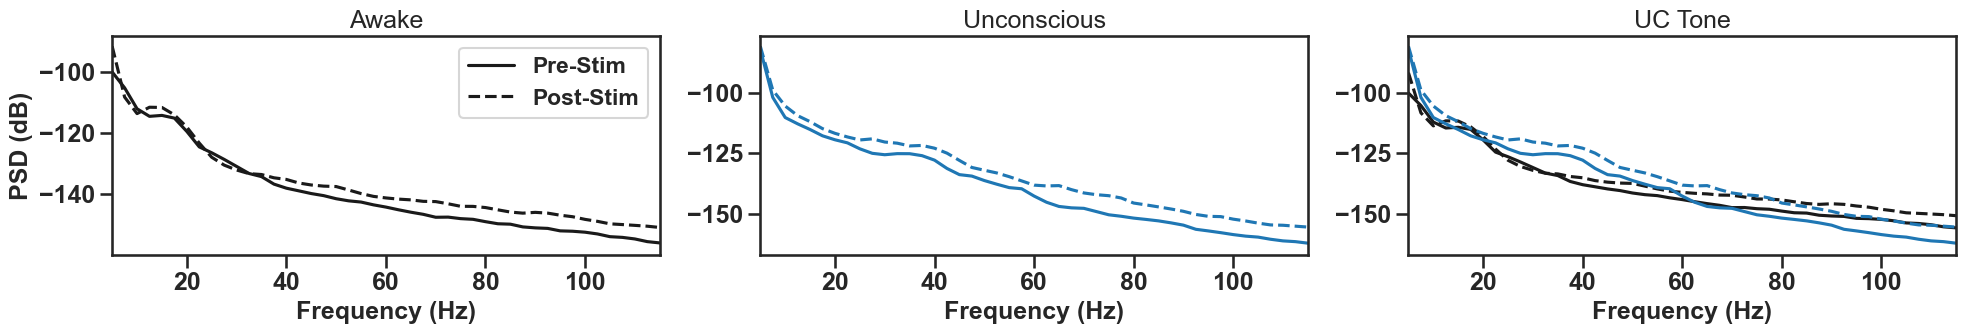

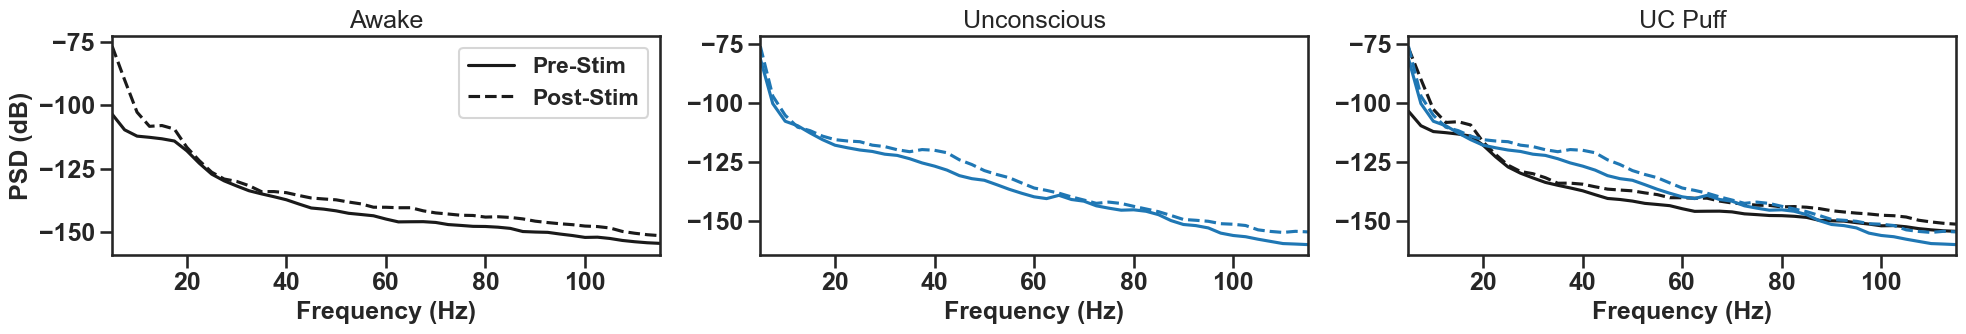

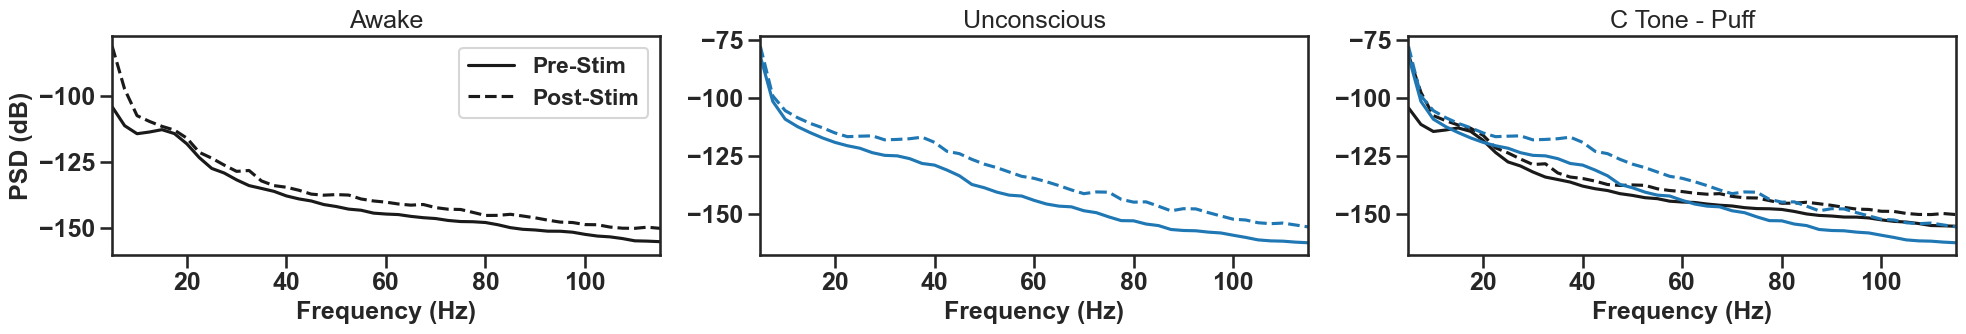

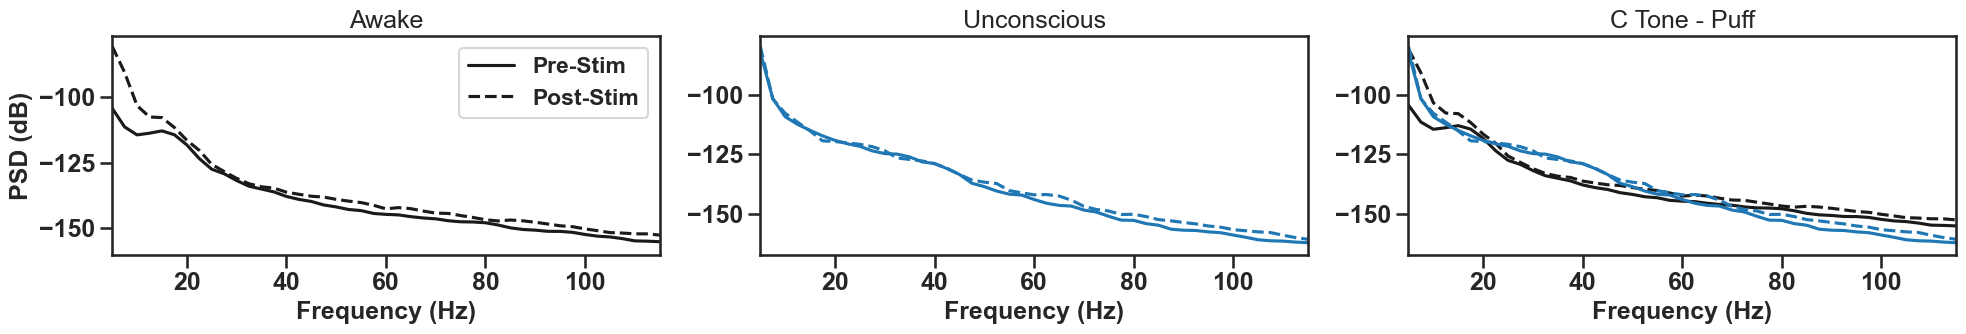

In [99]:
stims_print = ['tone_only', 'puff_only', 'cpt_tone', 'cpt_puff']
for stim in stims_print:
    print(stim)
    plot_raw_pre_post(stim, 5, 150)

<ipython-input-12-0723749fef3c>:98: UserWarning: No contour levels were found within the data range.
  ax[i,0].contour(timepts, freq, fdr_awake, levels=[0.5], colors=[[0,0,0]], linewidths=contour_width)
<ipython-input-12-0723749fef3c>:113: UserWarning: No contour levels were found within the data range.
  ax[i,1].contour(timepts, freq, fdr_drug, levels=[0.5], colors=[[0,0,0]], linewidths=contour_width)
<ipython-input-12-0723749fef3c>:125: UserWarning: No contour levels were found within the data range.
  ax[i,2].contour(timepts, freq, fdr_diff, levels=[0.5], colors=[[0,0,0]], linewidths=contour_width)
<ipython-input-12-0723749fef3c>:98: UserWarning: No contour levels were found within the data range.
  ax[i,0].contour(timepts, freq, fdr_awake, levels=[0.5], colors=[[0,0,0]], linewidths=contour_width)
<ipython-input-12-0723749fef3c>:113: UserWarning: No contour levels were found within the data range.
  ax[i,1].contour(timepts, freq, fdr_drug, levels=[0.5], colors=[[0,0,0]], linewidths=

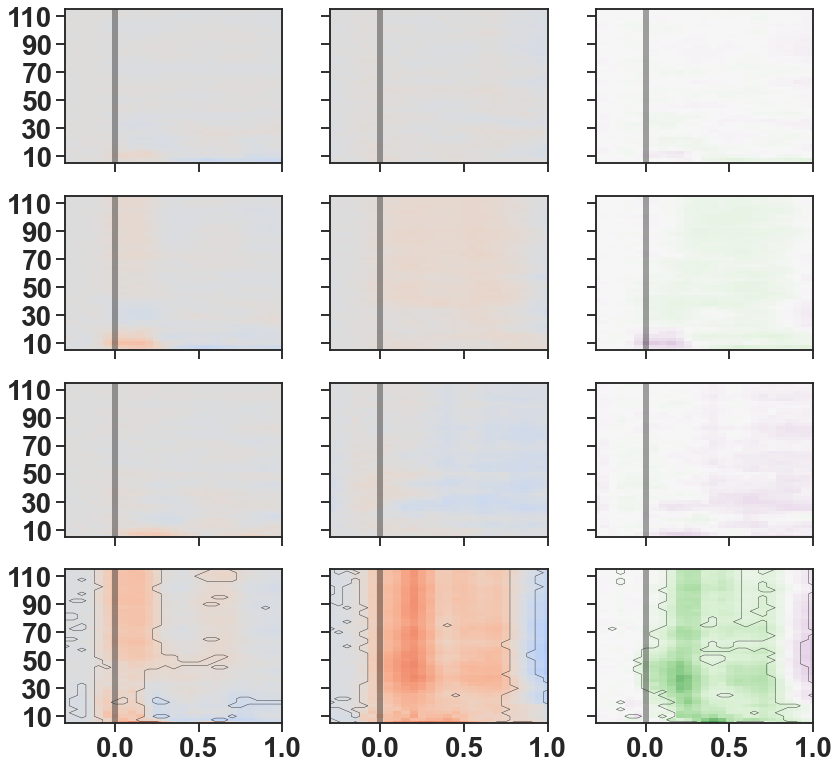

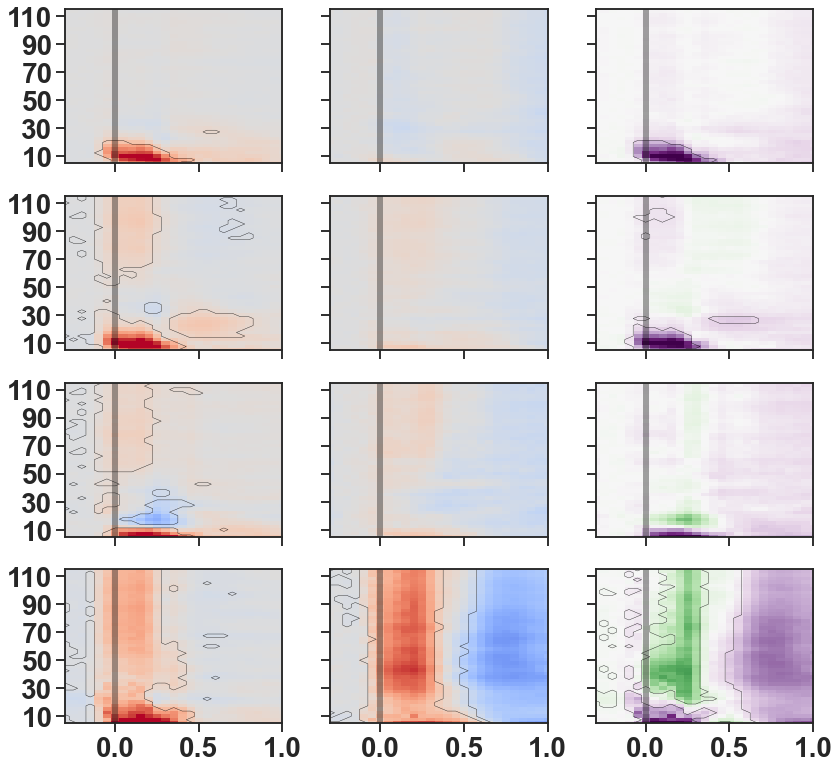

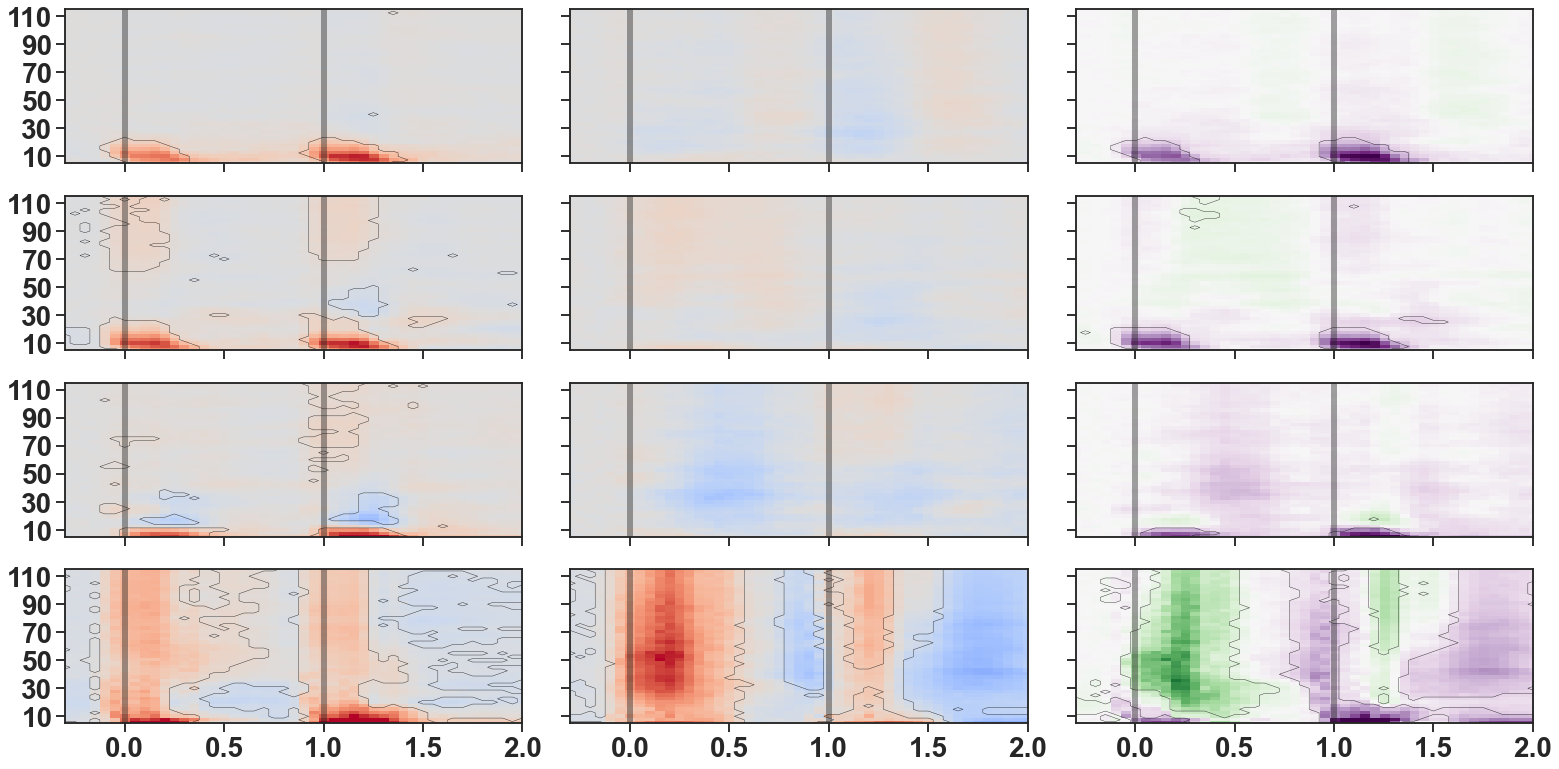

In [13]:
# stims_print = ['tone_only', 'puff_only', 'cpt_tone']
stims_print = ['tone_only', 'puff_only', 'cpt_tone']
for stim in stims_print:
    plot_db_change_results_new(stim, 5, 120)
    plt.savefig(f'{save_folder}/{stim}_total_power_results_ro.png', dpi=300)
    plt.savefig(f'{save_folder}/{stim}_total_power_results_ro.pdf', transparent=True)

In [16]:
def plot_colorbar():
    
    fig, ax = plt.subplots(figsize=(10,2))
    
    low = -5
    high = 5
    
    area = 'CPB'
    stim = 'tone_only'
    awake = db_change_results.loc[area,:,:,stim,'awake',:].mean('session')

    im = plot_spectrogram(timepts - 0.5, freq, awake, cmap='coolwarm', clim=[low, high])
    
    fig.colorbar(im, ax, orientation='horizontal')
    ax.set_title(r'dB change from baseline', size='30', weight='bold')
    fig.tight_layout()

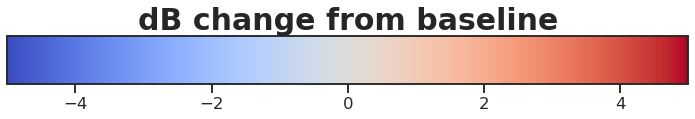

In [16]:
plot_colorbar()
# plt.savefig('colorbar_db_change.png', dpi=300)
plt.savefig(f'colorbar_db_change.pdf', transparent=True)

In [17]:
def plot_colorbar_stats():
    
    fig, ax = plt.subplots(figsize=(10,2))
    
    low = -5
    high = 5
    
    area = 'CPB'
    stim = 'tone_only'
    awake = db_change_results.loc[area,:,:,stim,'awake',:].mean('session')

    im = plot_spectrogram(timepts - 0.5, freq, awake, cmap='PRGn', clim=[low, high])
    
    
    fig.colorbar(im, ax, orientation='horizontal')
    ax.set_title(r'dB change (propofol - awake)', size='30', weight='bold')
    fig.tight_layout()

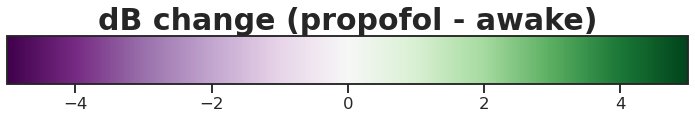

In [18]:
plot_colorbar_stats()
# plt.savefig('colorbar_db_stats.png', dpi=300)
plt.savefig(f'colorbar_db_stats.pdf', transparent=True)